# Dataset Preparation

## Prepare the Dataset from Digital Library and save to Dataframe and .csv

### PARAGRAPHS - PAGES - SENTENCES --- from JSON files

In [ ]:
import os
import json
import pandas as pd

current_dir = os.getcwd()
folder_path = os.path.abspath(os.path.join(current_dir, "..", "..", "output"))

min_sentence_length = 30
min_paragraph_length = 200
min_page_length = 200


unique_sentences = set()
unique_paragraphs = set()
unique_pages = set()

data_sentences = []
data_paragraphs = []
data_pages = []

paragraph_word_counts = []
paragraph_char_counts = []

shortest_paragraph_word_count = float('inf')
longest_paragraph_word_count = 0
shortest_paragraph_char_count = float('inf')
longest_paragraph_char_count = 0
shortest_paragraph = ""
longest_paragraph = ""

# Load book titles mapping from a separate JSON file
with open("documents.json", "r", encoding="utf-8") as f:
    book_titles = json.load(f)

# Create a mapping of book IDs to their respective titles
pk_to_title = {entry["pk"]: entry["title"] for entry in book_titles}

# Track book index (ensures books are uniquely indexed)
book_index_map = {}  # {book_id: book_index}
book_counter = 0

# Process all JSON files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):
        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r', encoding='utf-8') as f:
            json_content = json.load(f)

        book_id = file_name.split(".")[0]
        book_title = pk_to_title.get(book_id, "Unknown Title")

        # Assign a unique book index
        if book_id not in book_index_map:
            book_index_map[book_id] = book_counter
            book_counter += 1

        book_index = book_index_map[book_id]  

        # Store sentences (skip duplicates)
        sentences = json_content.get("sentences", [])
        for sentence_index, sentence in enumerate(sentences):
            if len(sentence) >= min_sentence_length and sentence not in unique_sentences:
                unique_sentences.add(sentence)
                data_sentences.append({
                    "book_index": book_index,
                    "book_id": book_id,
                    "book_title": book_title,
                    "sentence_index": sentence_index,
                    "text": sentence
                })

        # Store paragraphs with paragraph index relative to the book (skip duplicates)
        paragraphs = json_content.get("paragraphs", [])
        paragraph_index = 0  
        for paragraph in paragraphs:
            word_count = len(paragraph.split())
            char_count = len(paragraph)
            
            # Tracking word and character count statistics
            paragraph_word_counts.append(word_count)
            paragraph_char_counts.append(char_count)

            # Update the shortest and longest paragraphs
            if word_count < shortest_paragraph_word_count:
                shortest_paragraph_word_count = word_count
                shortest_paragraph = paragraph
            if word_count > longest_paragraph_word_count:
                longest_paragraph_word_count = word_count
                longest_paragraph = paragraph
                
            if char_count < shortest_paragraph_char_count:
                shortest_paragraph_char_count = char_count
            if char_count > longest_paragraph_char_count:
                longest_paragraph_char_count = char_count

            if len(paragraph) >= min_paragraph_length and paragraph not in unique_paragraphs:
                unique_paragraphs.add(paragraph)
                data_paragraphs.append({
                    "book_index": book_index,
                    "book_id": book_id,
                    "book_title": book_title,
                    "paragraph_index": paragraph_index,
                    "text": paragraph,
                    "word_count": word_count,
                    "char_count": char_count
                })
                paragraph_index += 1  

        # Store pages (skip duplicates)
        pages = json_content.get("pages", [])
        page_index = 0  
        for page in pages:
            if len(page) >= min_page_length and page not in unique_pages:
                unique_pages.add(page)
                data_pages.append({
                    "book_index": book_index,
                    "book_id": book_id,
                    "book_title": book_title,
                    "page_index": page_index,
                    "text": page
                })
                page_index += 1  

# Convert data into DataFrame
df_sentences = pd.DataFrame(data_sentences)
df_paragraphs = pd.DataFrame(data_paragraphs)
df_pages = pd.DataFrame(data_pages)

# Average word and character count for paragraphs
avg_paragraph_word_count = sum(paragraph_word_counts) / len(paragraph_word_counts) if paragraph_word_counts else 0
avg_paragraph_char_count = sum(paragraph_char_counts) / len(paragraph_char_counts) if paragraph_char_counts else 0

# Display the paragraph statistics
print(f"Sentences: {len(df_sentences)}\nParagraphs: {len(df_paragraphs)}\nPages: {len(df_pages)}")
print(f"Average paragraph word count: {avg_paragraph_word_count}")
print(f"Average paragraph character count: {avg_paragraph_char_count}")
print(f"Shortest paragraph word count: {shortest_paragraph_word_count}")
print(f"Longest paragraph word count: {longest_paragraph_word_count}")
print(f"Shortest paragraph character count: {shortest_paragraph_char_count}")
print(f"Longest paragraph character count: {longest_paragraph_char_count}")

# Saving the data to CSV files
df_paragraphs_half = df_paragraphs.sample(frac=0.5, random_state=42)
df_paragraphs_quarter = df_paragraphs.sample(frac=0.25, random_state=42)

print(f"Paragraphs quarter: {len(df_paragraphs_quarter)}")

df_sentences.to_csv(f"books_to_csv/sentences_limited_to_{min_sentence_length}.csv", index=False)
df_paragraphs.to_csv(f"books_to_csv/paragraphs_limited_to_{min_paragraph_length}.csv", index=False)
df_pages.to_csv(f"books_to_csv/pages_limited_to_{min_page_length}.csv", index=False)
df_paragraphs_half.to_csv(f"books_to_csv/paragraphs_limited_to_{min_paragraph_length}_half.csv", index=False)
df_paragraphs_quarter.to_csv(f"books_to_csv/paragraphs_limited_to_{min_paragraph_length}_quarter.csv", index=False)



Sentences: 1253570
Paragraphs: 181843
Pages: 100020
Average paragraph word count: 63.725251516279194
Average paragraph character count: 413.47675147384297
Shortest paragraph word count: 1
Longest paragraph word count: 2016
Shortest paragraph character count: 3
Longest paragraph character count: 7759
Paragraphs quarter: 45461


### Paragraphs - min 200 characters 
- quarter sample of whole dataset

In [29]:
import pandas as pd
import os

current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, "..", "datasets", "paragraphs_limited_to_200_quarter.csv"))
books_ratings_df = pd.read_csv(file_path, encoding='ISO-8859-1')

books_ratings_df.head(10)

,book_index,book_id,book_title,paragraph_index,text,word_count,char_count
0,70,3937721e-6e30-4bd1-8e04-50b05100bf28,Optics in Our Time,1001,"Although we have learned a lot we still lack the full picture. In particular, there is still no unique answer to the long-standing question: âWhat is a photon?â In the present essay we of course do not answer this deep question either but illuminate one important aspect of the photon that on ï¬rst sight looks very strange that is the wave-particle dualism. Indeed, according to the quantum theory of radiation the photon is a wave and a particle at the same time and their respective distinct features manifest themselves in countless phenomena. The double-slit experiment with individual photons is one of them. The ultimate goal of our article is to discuss a rather special double-slit experiment based on two entangled photons which seems to show simultaneously the wave and the particle nature of light. Such a behavior which is strictly forbidden by quantum theory and, in particular, by the principle of complementarity makes the photon even stranger. However, a closer look at the details of the light generation reveals that there is no violation of quantum mechanics, and in the words of G. Stein: â. . .suddenly it doesnât look strange at all.â",193,1156
1,231,97718729-2637-4aa2-8f86-026f7ce9722e,North Sea Region Climate Change Assessment,1560,"1980â2005: c multi-model-mean in the CMIP5 experiment, d difference between multi-model mean and precipitation analyses from the Global Precipitation Climatology Project (Adler et al. 2003). Note the different scales for the respective mean and bias maps (Flato et al 2013: Figs. 9.2 and 9.4, panels (a) and (b). Abridged caption)",50,330
2,179,7a007b86-f839-46d7-be69-cc38ecf001b8,"Habitats and Biota of the Gulf of Mexico: Before the Deepwater Horizon Oil Spill: Volume 1: Water Quality, Sediments, Sediment Contaminants, Oil and Gas Seeps, Coastal Habitats, Offshore Plankton and Benthos, and Shellfish",141,"stable or increasing. Large numbers of leatherback sea turtles are captured each year in the Gulf as bycatch in pelagic longline fisheries. Hawksbills are the rarest of the five species of sea turtle that occur in the Gulf of Mexico, and their current abundance is only a fraction of historical levels because millions were killed for tortoiseshell (jewelry, combs, brushes, buttons, etc.) during the past 100 years. Significant threats to hawksbills include destruction of nesting habitat, their dependence on coral reefs (one of the worldâs most endangered ecosystems) for food and shelter, and the continued trade in hawksbill products. Impacts from bycatch in Gulf fisheries to hawksbill sea turtles are minimal. In summary, because sea turtles are difficult to study and since some species have been studied more than others, there are significant gaps in the data available by species, as well as by life stage. However, despite the data gaps and limitations associated with selected data sets",158,999
3,337,d9f69fee-936a-472a-983b-f760acabf8e4,Understanding Society and Natural Resources : Forging New Strands of Integration Across the Social Sciences,24,"science during environmental crises through two case studies â the Deepwater Horizon oil spill and Hurricane Sandy. Machlis et al. suggest that a research agenda which includes integration efforts needs to be developed for understanding and improving science during crisis. Friedrichs (Chap. 4) makes the case for modified Malthusian theories to ground the study of resource management through science integration. He contends that the main impediment to integration both between various social scientific disciplines and between the social and the physical sciences is a refusal of social scientists to appreciate how deeply the societal sphere is embedded in wider biophysical and social-ecological systems. The chapter begins with a classical Malthusian framework and gradually adds complexity to it, sh

### PROCESS JSON FILES -> get the metadata (SUMMARY)

In [4]:
import json
import os
import pandas as pd

def process_json_to_dataframe(file_path):
    # Load JSON
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    authors = {}
    entryauthor = []
    books = []
    feeds = []
    book_author_mapping = {}
    feed_entry_mapping = {}

    # PROCESS JSON
    for item in data:
        fields = item.get("fields", {})
        model = item.get("model")

        # BOOKS
        if model == "core.entry":
            books.append({
                "id": item["pk"],
                "title": fields.get("title"),
                "summary": fields.get("summary"),
                "identifiers": fields.get("identifiers")
            })

        # AUTHORS
        if model == "core.author":
            authors[item["pk"]] = {
                "name": fields.get("name", ""),
                "surname": fields.get("surname", "")
            }

        # BOOK-AUTHOR
        if model == "core.entryauthor":
            entry_id = fields.get("entry")
            author_id = fields.get("author")
            if entry_id not in book_author_mapping:
                book_author_mapping[entry_id] = []
            book_author_mapping[entry_id].append(author_id)

        # FEEDS
        if model == "core.feed":
            feeds.append({
                "id": item["pk"],
                "title": fields.get("title"),
                "entries": fields.get("entries", [])
            })
            for entry_id in fields.get("entries", []):
                if entry_id not in feed_entry_mapping:
                    feed_entry_mapping[entry_id] = []
                feed_entry_mapping[entry_id].append(fields.get("title"))

    # list of book data with authors and feeds
    book_data = []
    for book in books:
        book_id = book["id"]

        # AUTHORS for BOOKS
        author_ids = book_author_mapping.get(book_id, [])
        author_names = [
            f"{authors[author_id]['name']} {authors[author_id]['surname']}" 
            for author_id in author_ids if author_id in authors
        ]

        # FEEDS for BOOKS
        feed_titles = feed_entry_mapping.get(book_id, [])

        # BOOK DATA
        book_data.append({
            "book_title": book["title"],
            "summary": book["summary"],
            "identifiers": book["identifiers"],
            "authors": ", ".join(author_names) if author_names else "No authors",
            "feeds": ", ".join(feed_titles) if feed_titles else "No feeds"
        })

    print(f"NUM OF BOOKS: {len(books)}\nNUM OF AUTHORS: {len(authors)}\nNUM OF FEED: {len(feeds)}")

    # DATAFRAME
    df = pd.DataFrame(book_data)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_colwidth', None)
    return df

# PATH to JSON files
current_dir = os.getcwd()
json_path_1 = os.path.abspath(os.path.join(current_dir, "..", "datasets", "openresearchlibrary_entities.json"))
json_path_2 = os.path.abspath(os.path.join(current_dir, "..", "datasets", "mtf_entities.json"))

# PROCESS JSON files
print("Open Research Library:")
df_opensearch = process_json_to_dataframe(json_path_1)
print("\nMTF:")
df_mtf = process_json_to_dataframe(json_path_2)

df_summaries = pd.concat([df_opensearch, df_mtf], ignore_index=True)



Open Research Library:
NUM OF BOOKS: 403
NUM OF AUTHORS: 823
NUM OF FEED: 22

MTF:
NUM OF BOOKS: 43
NUM OF AUTHORS: 123
NUM OF FEED: 36


### OPEN RESEARCH LIBRARY - ENTITIES.JSON - HEAD

In [7]:
df_opensearch.head(5)

,book_title,summary,identifiers,authors,feeds
0,Digital Kenya : An Entrepreneurial Revolution in The Making,Research & Development; Technology Policy; Development Economics,"{""isbn"": ""urn:isbn:9783319184272""}","Bitange Ndemo, Tim Weiss",OPP
1,Environmental Governance of the Baltic Sea (Volume 10.0),Environmental Management; Water Policy,"{""isbn"": ""urn:isbn:9783319270050""}",No authors,BKS
2,Weißbuch Gelenkersatz : Versorgungssituation Bei Endoprothetischen Hüft- Und Knieoperationen in Deutschland,orthopedics; surgery; medicine; biotechnology,"{""isbn"": ""urn:isbn:9783662529041""}",No authors,DBS
3,Saving For Development : How Latin America and The Caribbean Can Save More and Better,development; economic policy,"{""isbn"": ""urn:isbn:9781349949281""}","Eduardo Cavallo, Inter-American Development Bank, Tomás Serebrisky",PrPr
4,"Informatics in the Future : Proceedings of the 11th European Computer Science Summit (ECSS 2015), Vienna, October 2015","Introduction\n\nThis book is open access under a CC BY-NC 4.0 license.\n\nThis volume discusses the prospects and evolution of informatics (or computer science), which has become the operating system of our world, and is today seen as the science of the information society. Its artifacts change the world and its methods have an impact on how we think about and perceive the world. Classical computer science is built on the notion of an “abstract” machine, which can be instantiated by software to any concrete problem-solving machine, changing its behavior in response to external and internal states, allowing for self-reflective and “intelligent” behavior. However, current phenomena such as the Web, cyber physical systems or the Internet of Things show us that we might already have gone beyond this idea, exemplifying a metamorphosis from a stand-alone calculator to the global operating system of our society.\n\nThus computer scientists will need to reconsider the foundations of their discipline to realize the full potential of our field. Taking often contradictory developments into consideration, researchers will not be able to tackle specific technological or methodological problems in the future without also a broader reflection on their field. The papers in this book take a first step forward and reflect on these issues from different perspectives. The broad spectrum of topics includes\n\nInformatics: a discipline with a (short) history and a high impact\nInterdisciplinarity: how to do research\nEthics: what is our responsibility\nDiversity: why are there so few women in informatics\nCombining informatics, history and art: a special contribution.\nThis book is intended for all informatics researchers, in academia as well as in industry. It is our responsibility – not only as scientists but also as citizens – to make the public aware of the dichotomies and dialectic relationships of computer science.","{""isbn"": ""urn:isbn:9783319557359""}","Frank van Harmelen, Hannes Werthner",DOVI


### MTF - ENTITIES.JSON - HEAD

In [8]:
df_mtf.head(5)

,book_title,summary,identifiers,authors,feeds
0,Odporúčanie pre softvérových inžinierov,"Táto knižka je výsledkom doktorandského seminára, ktorý som viedol v akademickom roku 2014/2015. Na Fakulte informatiky a informačných technológií máme šikovných študentov \nschopných naplniť aj náročné predstavy. Jednou takou predstavou je, aby zo seminára vznikol \nmonotematický výskumný text, ktorý dopracujeme do podoby, pripravenej na tlač. V oblasti \nprogramových a informačných systémov sa takéto štúdie podarilo vydať už niekoľkokrát. Zatiaľ \nčo v prvom zväzku Štúdií sme podchytili seminár venovaný návrhovým vzorom a v druhom seminár venovaný webovej inteligencii, v treťom sa seminár sústreďoval na podstatu softvérovej \narchitektúry a v štvrtom zväzku sme spracovali témy seminára, venovaného softvérovým paradigmám. Zatiaľ posledný, piaty zväzok sa venuje webovede, vznikajúcej vedeckej disciplíne, \nktorá chce študovať web v rôznych aspektoch.\nTento v poradí už šiesty zväzok sa zameriava na odporúčanie v softvérovom inžinierstve. \nMetódy odporúčania informácií sa intenzívne študovali v predošlých zhruba dvadsiatich rokoch \nnajmä v súvislosti s odporúčaním informácií na webe. V posledných rokoch dochádza k čoraz \nintenzívnejšiemu uvedomeniu, že tieto alebo podobné metódy môžu byť užitočné aj \nv softvérovom inžinierstve. Ide najmä o odporúčania, ktoré sa poskytnú softvérovému inžinierovi. Ukázalo sa, že je až prekvapujúco veľa možností, čo by bolo vhodné odporúčať niekomu, kto \nsa podieľa na vývoji softvéru. Druhou stránkou je pestrosť metód, ako odporúčania robiť. \nCelú problematiku som rozdelil do trinástich častí medzi študentov seminára. Východiskovým literárnym zdrojom pre štúdium bol monografický zborník [1]. Po prednesení príspevkov \na diskusii na seminári spracovali autori témy aj písomne. Prvotnú zodpovednosť za kapitoly sme \nsi podelili takto: Blšták za kapitoly 6 a 7, Bystrický za kapitoly 10 a 12, Frťala za kapitoly 9 a \n13, Kaššák za kapitoly 1 a 4 , Konôpka za kapitoly 3 a 11, Laurinec za kapitolu 8 a Lóderer za \nkapitoly 2 a 5. Spomenutý zborník sa ukázal byť v mnohom aj cennou inšpiráciou pri písaní, čo \ns vďakou priznávame. Autori však preštudovali množstvo ďalšej súčasnej vedeckej literatúry \no príslušnej problematike, o čom svedčia aj zoznamy literatúry pripojené na koniec každej kapitoly. Vedomosti z nich získané tiež využili pri písaní textu.","{""doi"": null, ""isbn"": ""978-3-642-45134-8""}","Pavol Návrat, Miroslav Blšták, Michal Bystrický, Tomáš Frťala, Ondrej Kaššák, Martin Konôpka, Peter Laurinec, Marek Lóderer",PSI_B
1,Úvod do matematickej logiky,"Tento učebný text je určený študentom prvého ročníka fakulty informatiky a in- formačných technológií Slovenskej technickej univerzity v Bratislave. Predstavuje spísane prednášky z predmetu matematická logika.\nŠtruktúra tohoto textu je upravená tak, že každá kapitola tvorí jednu prednášku.\nČitateľovi predkladáme 11 kapitol, čo je podľa našich skúsenosti maximálny možný počet prednášok, ktorý sa dá stihnúť’ počas 13-týždňového semestra. V zlých ”rokoch“ sa fyzicky nestihne odprednášať ani 11 prednášok. Vtedy tento učebný´\ntext slúži študentom na samoštúdium, pretože základne vedomosti majú mat’ všetci študenti rovnaké, bez ohľadu na rok, v ktorom študovali.\nPo obsahovej stránke možno učebnicu rozdeliť’ na štyri časti.\n-\tV prvých troch kapitolách zadeﬁnujeme formuly výrokovej logiky, objasníme si ich význam a ukážeme, ako sa odvodzujú. Ukážeme si tiež, že daným spôsobom vieme formulu odvodiť’ práve vtedy, keď je vždy pravdivá.\n-\tKapitoly 4 až 6 sú nadstavbou prvých troch. Opíšeme si ďalšie metódy, pomocou ktorých vieme zistiť’, či je formula tautológia, ako aj aplikácie výrokovej logiky na spínacie a logické obvody a na neurónové siete.\n-\tĎalšie tri kapitoly sa zaoberajú predikátovou logikou. Tak ako pri výrokovej logike, objasníme si význam formúl predikátovej logiky a metódy ich odvodzovania. Na odvodzovanie formúl budeme používať’ sémantick

## Analyze - Public Dataset - GoodReads books - book descriptions

In [4]:
import pandas as pd
import os

current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, "..", "datasets", "book_details_clean.csv"))
books_ratings_df = pd.read_csv(file_path, encoding='ISO-8859-1')

books_ratings_df.head(10)

,Unnamed: 0,title,author,rating,no_of_ratings,no_of_reviews,description,genres
0,0,Divergent,Veronica Roth,4.15,3765886,"Â 117,791","In Beatrice Prior's dystopian Chicago world, s...","Young Adult, Dystopia, Fantasy, Fiction, Scien..."
1,1,Catching Fire,Suzanne Collins,4.31,3305054,"Â 113,480",Sparks are igniting.Flames are spreading.And t...,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."
2,2,The Fault in Our Stars,John Green,4.15,4851513,"Â 174,662",Despite the tumor-shrinking medical miracle th...,"Young Adult, Romance, Fiction, Contemporary, R..."
3,3,To Kill a Mockingbird,Harper Lee,4.27,5784553,"Â 112,055",The unforgettable novel of a childhood in a sl...,"Classics, Fiction, Historical Fiction, School,..."
4,4,The Lightning Thief,Rick Riordan,4.30,2752945,"Â 87,446",Alternate cover for this ISBN can be found her...,"Fantasy, Young Adult, Mythology, Fiction, Midd..."
5,5,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.58,3889833,"Â 77,063","Harry Potter, along with his best friends, Ron...","Fantasy, Fiction, Young Adult, Magic, Children..."
6,6,The Book Thief,Markus Zusak,4.39,2410045,"Â 138,420",Librarian's note: An alternate cover edition c...,"Historical Fiction, Fiction, Young Adult, Hist..."
7,7,The Hobbit,J.R.R. Tolkien,4.28,3729821,"Â 65,508",In a hole in the ground there lived a hobbit. ...,"Fantasy, Classics, Fiction, Adventure, Young A..."
8,8,Insurgent,Veronica Roth,3.98,1435810,"Â 62,356",One choice can transform youÃ¢ÂÂor it can de...,"Young Adult, Dystopia, Fiction, Fantasy, Scien..."
9,9,Harry Potter and the Chamber of Secrets,J.K. Rowling,4.43,3669432,"Â 73,212",Ever since Harry Potter had come home for the ...,"Fantasy, Fiction, Young Adult, Magic, Children..."


In [ ]:
import pandas as pd
import os

current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, "..", "datasets", "book_details_clean.csv"))
books_ratings_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Calculate word count and character count for each description
word_counts = books_ratings_df['description'].apply(lambda x: len(str(x).split()))
char_counts = books_ratings_df['description'].apply(lambda x: len(str(x)))
# Calculate average, min, and max for word count and character count
avg_word_count = word_counts.mean()
avg_char_count = char_counts.mean()

min_word_count = word_counts.min()
max_word_count = word_counts.max()

min_char_count = char_counts.min()
max_char_count = char_counts.max()

# Print the results
print(f"Average Word Count: {avg_word_count}")
print(f"Average Character Count: {avg_char_count}")
print(f"Minimum Word Count: {min_word_count}")
print(f"Maximum Word Count: {max_word_count}")
print(f"Minimum Character Count: {min_char_count}")
print(f"Maximum Character Count: {max_char_count}")
print(f"\nDataset: {len(books_ratings_df)} book descriptions")

Average Word Count: 163.31394560385746
Average Character Count: 996.4563399382205
Minimum Word Count: 1
Maximum Word Count: 1467
Minimum Character Count: 5
Maximum Character Count: 18656

Dataset: 13273 book descriptions


### Ratings, Number of ratings, Number of reviews - GoodReads dataset
- defining thresholds for popularity / novelty:
  - Suggested Popularity Thresholds (Top 25%):
  - Suggested Novelty Thresholds (Bottom 25%):


Ratings Summary:
count   13,273.00000
mean         4.03937
std          0.32612
min          0.00000
25%          3.86000
50%          4.04000
75%          4.23000
max          5.00000
Name: rating, dtype: float64

Number of Ratings Summary:
count      13,273.00000
mean       63,017.00505
std       238,176.16809
min             0.00000
25%           829.00000
50%        10,751.00000
75%        43,042.00000
max     8,104,716.00000
Name: no_of_ratings, dtype: float64

Number of Reviews Summary:
count    13,273.00000
mean      3,631.26708
std      10,515.87531
min           0.00000
25%          87.00000
50%         712.00000
75%       2,756.00000
max     227,613.00000
Name: no_of_reviews, dtype: float64

Suggested Popularity Thresholds (Top 25%):
 - No. of Ratings > 43042
 - No. of Reviews > 2756
 - Rating > 4.04 (Above Mean)

Suggested Novelty Thresholds (Bottom 25%):
 - No. of Ratings < 829
 - No. of Reviews < 87
 - Rating < 3.86 (Bottom Quartile)


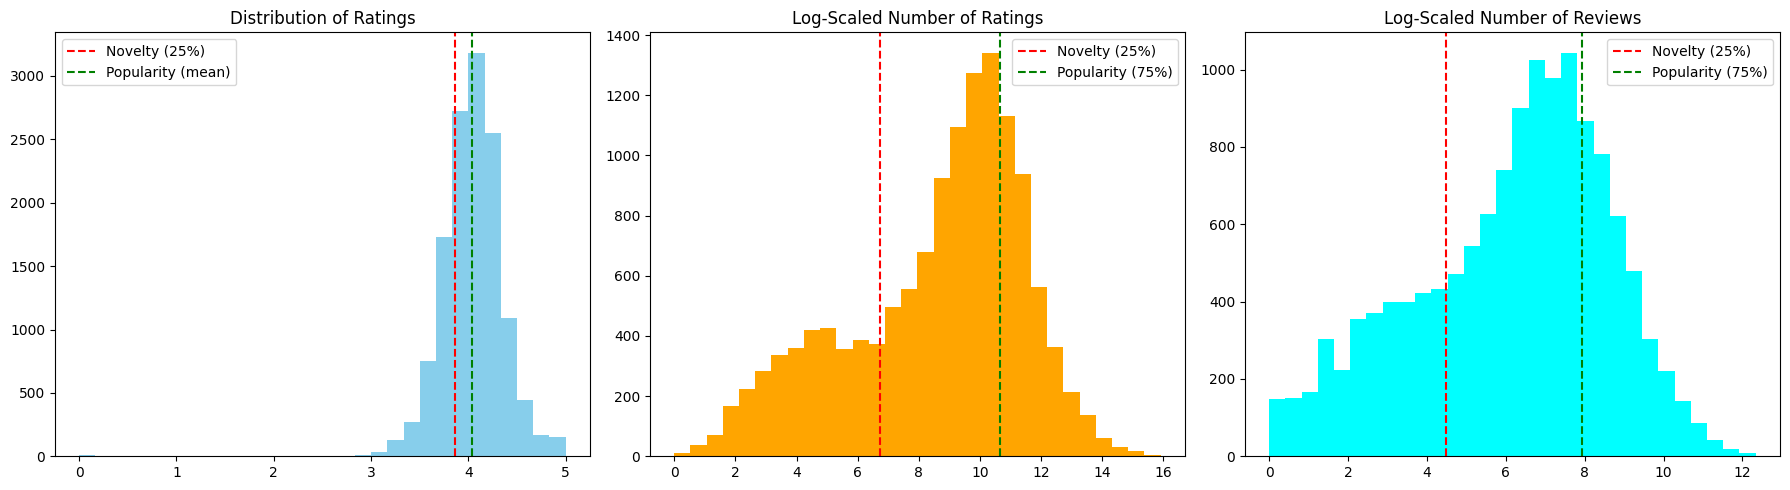

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# === Load and Clean Data ===
current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, "..", "datasets", "book_details_clean.csv"))
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Clean 'no_of_ratings' and 'no_of_reviews'
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)
df['no_of_reviews'] = df['no_of_reviews'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# === Summary Statistics ===
pd.options.display.float_format = '{:,.5f}'.format

print("Ratings Summary:")
print(df['rating'].describe())

print("\nNumber of Ratings Summary:")
print(df['no_of_ratings'].describe())

print("\nNumber of Reviews Summary:")
print(df['no_of_reviews'].describe())

# === Threshold Suggestions ===

# Popularity (Top 25%)
pop_ratings_threshold = np.percentile(df['no_of_ratings'], 75)
pop_reviews_threshold = np.percentile(df['no_of_reviews'], 75)
pop_rating_score_threshold = df['rating'].mean()  # or median

# Novelty (Bottom 25%)
novel_ratings_threshold = np.percentile(df['no_of_ratings'], 25)
novel_reviews_threshold = np.percentile(df['no_of_reviews'], 25)
novel_rating_score_threshold = np.percentile(df['rating'], 25)

# === Print Thresholds ===

print("\nSuggested Popularity Thresholds (Top 25%):")
print(f" - No. of Ratings > {pop_ratings_threshold:.0f}")
print(f" - No. of Reviews > {pop_reviews_threshold:.0f}")
print(f" - Rating > {pop_rating_score_threshold:.2f} (Above Mean)")

print("\nSuggested Novelty Thresholds (Bottom 25%):")
print(f" - No. of Ratings < {novel_ratings_threshold:.0f}")
print(f" - No. of Reviews < {novel_reviews_threshold:.0f}")
print(f" - Rating < {novel_rating_score_threshold:.2f} (Bottom Quartile)")

# === Visualize Distributions ===
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Ratings
axs[0].hist(df['rating'], bins=30, color='skyblue')
axs[0].axvline(novel_rating_score_threshold, color='red', linestyle='--', label='Novelty (25%)')
axs[0].axvline(pop_rating_score_threshold, color='green', linestyle='--', label='Popularity (mean)')
axs[0].set_title("Distribution of Ratings")
axs[0].legend()

# Number of Ratings
axs[1].hist(np.log1p(df['no_of_ratings']), bins=30, color='orange')
axs[1].axvline(np.log1p(novel_ratings_threshold), color='red', linestyle='--', label='Novelty (25%)')
axs[1].axvline(np.log1p(pop_ratings_threshold), color='green', linestyle='--', label='Popularity (75%)')
axs[1].set_title("Log-Scaled Number of Ratings")
axs[1].legend()

# Number of Reviews
axs[2].hist(np.log1p(df['no_of_reviews']), bins=30, color='cyan')
axs[2].axvline(np.log1p(novel_reviews_threshold), color='red', linestyle='--', label='Novelty (25%)')
axs[2].axvline(np.log1p(pop_reviews_threshold), color='green', linestyle='--', label='Popularity (75%)')
axs[2].set_title("Log-Scaled Number of Reviews")
axs[2].legend()

plt.tight_layout()
plt.show()


### Genres

In [12]:
import pandas as pd
import os

current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, "..", "datasets", "book_details_clean.csv"))
books_ratings_df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 1: Convert the "genres" column to a list of all genres
all_genres = books_ratings_df['genres'].dropna().str.split(', ')

# Step 2: Flatten the list of lists into a single list
flattened_genres = [genre.strip() for sublist in all_genres for genre in sublist]

# Step 3: Use pandas to count each genre
import pandas as pd
genre_counts = pd.Series(flattened_genres).value_counts()

# Step 4: Display the top genres
print(genre_counts.head(20))  
print(f"Diff ROWS: {len(books_ratings_df['genres'].unique())}")
print(f"Diff GENRES: {len(genre_counts)}")

Fiction                 7212
Romance                 4326
Fantasy                 3365
Contemporary            2835
Young Adult             2588
Nonfiction              2208
Mystery                 2186
Historical Fiction      1821
Audiobook               1782
Classics                1565
Thriller                1417
Adult                   1413
Paranormal              1385
Contemporary Romance    1353
Historical              1348
Science Fiction         1048
Crime                   1047
Mystery Thriller        1032
Biography                934
Suspense                 904
Name: count, dtype: int64
Diff ROWS: 10921
Diff GENRES: 648


# Recommendation pipeline Development

## Content Based Algorithms - Implementation to recommend paragraphs and book descriptions

Feature Extraction Methods:  
1. TF-IDF  
2. LSA  
3. Bow  
4. FastText   
5. GloVe  
6. Sentence-BERT   

Similarity calculation metric:
- Cosine Similarity

-> choose 1 book description/paragraph  
-> run the algorithms for finding the recommended book description/paragraph for that chosen one - based on:  
- summary  
- paragraph  
- book description

## 1. TF-IDF

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import multiprocessing

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load TF-IDF Model
tfidf_vectorizer = joblib.load("saved_models/tfidf.pkl")

print("TF-IDF model loaded")

def tfidf_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found!")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    tfidf_matrix = tfidf_vectorizer.transform(filtered_data['text'])
    target_vector = tfidf_vectorizer.transform([input_text])
    cosine_sim = cosine_similarity(target_vector, tfidf_matrix).flatten()

    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Computing Similarities (TF-IDF)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            if time.time() - start_time > max_runtime:
                print("TF-IDF exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "TF-IDF",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "TF-IDF",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run TF-IDF Recommendation with Progress Bar
data = df_paragraphs
algo_name = "TF-IDF"

performance_data, input_data, recommendations = tfidf_recommendations(data, input_book_index, input_paragraph_index, tfidf_vectorizer, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"{algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


### for summary

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cdist

def tfidf_summary(data, book_title, top_n, similarity, threshold=0.5, return_all=False):
    tfidf = TfidfVectorizer(stop_words='english', max_features=10000)   # Compute TF-IDF matrix
    tfidf_matrix = tfidf.fit_transform(data['combined']).toarray()      # Convert sparse matrix to dense
    
    # Get the index of the book that matches the title
    idx = data.index[data["book_title"] == book_title].tolist()[0]
    
    # COSINE 
    if similarity == "cosine":  
        cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        filtered_scores = [(i, score) for i, score in sim_scores if i != idx]
        max_similarity_score = max(score for _, score in filtered_scores)
        
        th = threshold * max_similarity_score
        filtered_scores = [(i, score) for i, score in filtered_scores if score >= th]

        # Sort the remaining items based on similarity scores (descending)
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

        if not return_all:
            filtered_scores = filtered_scores[:top_n]


        recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]

    return recommendations



### for paragraph

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF Recommendation
def tfidf_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, top_n=5, threshold=0.5, exclude_input_book=True):
    # Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Remove duplicates
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)

    # Compute TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.transform(filtered_data['text'])  # Transform all paragraphs

    # Vectorize the input paragraph
    target_vector = tfidf_vectorizer.transform([input_text])

    # Compute Cosine Similarity
    cosine_sim = cosine_similarity(target_vector, tfidf_matrix).flatten()


    # Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    # Filter, sort, and get top N recommendations
    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]  # Exclude exact matches
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 2. LSA

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load LSA Model
tfidf_vectorizer, lsa_model, lsa_matrix = joblib.load("saved_models/lsa.pkl")

print("LSA model loaded")

def lsa_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found!")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_vector = lsa_model.transform(tfidf_vectorizer.transform([input_text]))
    
    tfidf_matrix_filtered = tfidf_vectorizer.transform(filtered_data["text"])
    lsa_matrix_filtered = lsa_model.transform(tfidf_matrix_filtered)

    cosine_sim = cosine_similarity(input_vector, lsa_matrix_filtered)[0]

    # Progress bar for similarity computation
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Computing Similarities (LSA)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            # Stop execution if runtime exceeds max_runtime
            if time.time() - start_time > max_runtime:
                print("LSA exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "LSA",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "LSA",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run LSA Recommendation with Progress Bar
data = df_paragraphs
algo_name = "LSA"

performance_data, input_data, recommendations = lsa_recommendations(data, input_book_index, input_paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"{algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


LSA model loaded


Computing Similarities (LSA): 100%|██████████| 181559/181559 [00:00<00:00, 1483399.74iteration/s]

✅ LSA testing complete! Results saved.
Elapsed Time: 19.11 sec, Memory Usage: 2397.43 MB, CPU Usage: 6.80%, IPS: 9499.82


### for summary - all

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


def lsa_summary(data, title, top_n, threshold=0.5, return_all=False):
    # Preprocess the text with TF-IDF
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['combined'])

    # Apply LSA (Latent Semantic Analysis)
    lsa = TruncatedSVD(n_components=100, random_state=42)  # Use 100 components for more nuanced analysis
    lsa_matrix = lsa.fit_transform(tfidf_matrix)

    # Compute cosine similarity matrix on the LSA-reduced features
    lsa_cosine_sim = cosine_similarity(lsa_matrix)

    idx = data.index[data["book_title"] == title].tolist()[0]
    sim_scores = list(enumerate(lsa_cosine_sim[idx]))
    
    # Remove the book itself and calculate max similarity
    filtered_scores = [(i, score) for i, score in sim_scores if i != idx]
    max_similarity_score = max(score for _, score in filtered_scores)

    # Apply dynamic threshold
    th = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= th]

    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    
    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    # recommendations = [(i[0], data["book_title"].iloc[i[0]]) for i in sim_scores]
    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    return recommendations



### for paragraph

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Train LSA Model
def train_lsa(data, n_components=100):
    # - data: DataFrame containing the text data.
    # - n_components: Number of dimensions for SVD (default=100).

    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

    lsa_model = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

    return tfidf_vectorizer, lsa_model, lsa_matrix

# LSA Recommendation Function (Fixed)
def lsa_recommendations(data, book_index, paragraph_index, tfidf_vectorizer, lsa_model, lsa_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    # Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Compute LSA representation for the input paragraph
    input_vector = lsa_model.transform(tfidf_vectorizer.transform([input_text]))

    # Filter dataset if `exclude_input_book=True`
    if exclude_input_book:
        filtered_data = data[data["book_index"] != book_index].reset_index(drop=True)
    else:
        filtered_data = data.copy().reset_index(drop=True)

    # Align `lsa_matrix` with `filtered_data`
    tfidf_matrix_filtered = tfidf_vectorizer.transform(filtered_data["text"])
    lsa_matrix_filtered = lsa_model.transform(tfidf_matrix_filtered)

    # Compute cosine similarity with **filtered** LSA matrix
    cosine_sim = cosine_similarity(input_vector, lsa_matrix_filtered)[0]

    # Get valid indices from filtered data
    valid_indices = filtered_data.index.tolist()

    # Ensure index lengths match
    if len(cosine_sim) != len(valid_indices):
        print(f"Mismatch detected: cosine_sim={len(cosine_sim)}, valid_indices={len(valid_indices)}")
        return []

    # Apply threshold
    sim_scores = [(valid_indices[idx], score) for idx, score in enumerate(cosine_sim) if score < 1.0]  # Exclude exact matches

    if not sim_scores:
        print("No valid recommendations found.")
        return []

    max_similarity_score = max(score for _, score in sim_scores)
    threshold_value = threshold * max_similarity_score

    # Filter, sort, and get top N recommendations
    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Return structured recommendations
    recommendations = [(filtered_data.loc[idx, "book_index"],
                        filtered_data.loc[idx, "paragraph_index"],
                        filtered_data.loc[idx, "text"],
                        filtered_data.loc[idx, "book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 3. BoW

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load BoW Model
bow_vectorizer, bow_matrix = joblib.load("saved_models/bow.pkl")

print("BoW model loaded")

def bow_recommendations(data, book_index, paragraph_index, bow_vectorizer, bow_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found!")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_vector = bow_vectorizer.transform([input_text])
    cosine_sim = cosine_similarity(input_vector, bow_matrix).flatten()
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (BoW)", unit="iteration") as pbar:
        filtered_scores = [(i, score) for i, score in enumerate(cosine_sim) if score < 1.0]
        max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("BoW exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=0.1)
            cpu_usage = cpu_end - cpu_start
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "BoW",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "BoW",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run BoW Recommendation with Progress Bar
data = df_paragraphs
algo_name = "BoW"

performance_data, input_data, recommendations = bow_recommendations(data, input_book_index, input_paragraph_index, bow_vectorizer, bow_matrix, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"{algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


### for summary - all

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def bow_summary(data, book_title, top_n, threshold=0.5, return_all=False):
    count_vectorizer = CountVectorizer(stop_words='english')
    bow_matrix = count_vectorizer.fit_transform(data['combined'])
    
    cosine_sim = cosine_similarity(bow_matrix, bow_matrix)
    
    idx = data[data["book_title"] == book_title].index[0]
    
    scores = list(enumerate(cosine_sim[idx]))
    filtered_scores = [(i, score) for i, score in scores if i != idx]  
    
    # Find the maximum similarity score
    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations



### for paragraph

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Train BoW Model
def train_bow(data):
    bow_vectorizer = CountVectorizer(stop_words='english')
    bow_matrix = bow_vectorizer.fit_transform(data['text'])  # Transform entire dataset
    return bow_vectorizer, bow_matrix

# BoW Recommendation Function
def bow_recommendations(data, book_index, paragraph_index, bow_vectorizer, bow_matrix, top_n=5, threshold=0.5, exclude_input_book=True):
    # Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Compute BoW representation for the input paragraph
    input_vector = bow_vectorizer.transform([input_text])

    # Compute cosine similarity
    cosine_sim = cosine_similarity(input_vector, bow_matrix).flatten()

    
    # Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    # Filter and sort recommendations
    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 4. FastText

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load FastText Model
# fasttext_model = joblib.load("saved_models/fasttext.model")
fasttext_model = FastText.load("saved_models/fasttext.model")

print("FastText model loaded")

def fasttext_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    process = psutil.Process()
    psutil.cpu_percent(interval=None)
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found!")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    def get_document_vector(text):
        tokens = text.split()
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
    
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])
    
    cosine_sim = np.zeros(len(filtered_data))
    with tqdm(total=len(filtered_data), desc=f"Computing Cosine Similarities (FastText)", unit="comparison") as pbar:
        for i in range(len(filtered_data)):
            cosine_sim[i] = cosine_similarity([input_vector], [doc_vectors[i]])[0, 0]
            pbar.update(1)
    
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Filtering & Sorting Similarities (FastText)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            if time.time() - start_time > max_runtime:
                print("FastText exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=0.1)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "FastText",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "FastText",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run FastText Recommendation with Progress Bar
data = df_paragraphs
algo_name = "FastText"

performance_data, input_data, recommendations = fasttext_recommendations(data, input_book_index, input_paragraph_index, fasttext_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"{algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")


### for summary - all

In [ ]:
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def train_fasttext_summary(data, vector_size=100, window=5, min_count=1, epochs=50):
    tokenized_descriptions = [desc.split() for desc in data['combined']]
    model = FastText(sentences=tokenized_descriptions, vector_size=vector_size, window=window, min_count=min_count, epochs=epochs)
    return model


def fasttext_summary(data, book_title, model, top_n=5, threshold=0.5, return_all=False):
    # Tokenize descriptions
    tokenized_descriptions = [desc.split() for desc in data['combined']]

    # Function to get document vector by averaging word embeddings
    def get_document_vector(tokens):
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    # Generate document vectors for all books
    doc_vectors = np.array([get_document_vector(tokens) for tokens in tokenized_descriptions])

    # Get index of the queried book
    if book_title not in data["book_title"].values:
        print(f"Book '{book_title}' not found!")
        return []

    book_idx = data[data["book_title"] == book_title].index[0]
    book_vector = doc_vectors[book_idx].reshape(1, -1)

    # Compute cosine similarities
    similarities = cosine_similarity(book_vector, doc_vectors)[0]

    # Exclude queried book before filtering
    scores_with_indices = [(i, score) for i, score in enumerate(similarities) if i != book_idx]

    if not scores_with_indices:
        print("No valid recommendations found!")
        return []

    max_similarity_score = max(score for _, score in scores_with_indices)
    dynamic_threshold = threshold * max_similarity_score

    filtered_scores = [(i, score) for i, score in scores_with_indices if score >= dynamic_threshold and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    return recommendations


### for paragraph

In [ ]:
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Train FastText Model
def train_fasttext(data):
    tokenized_texts = [text.split() for text in data['text']]
    model = FastText(tokenized_texts, vector_size=100, window=5, min_count=1, epochs=10)
    return model

# FastText Recommendation Function
def fasttext_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    # Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Convert text to FastText vectors
    def get_document_vector(text):
        tokens = text.split()
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    # Compute embeddings
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])

    # Compute cosine similarity
    cosine_sim = cosine_similarity([input_vector], doc_vectors)[0]

    
    # Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 5. GloVe

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

# SETTINGS'
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load GloVe Model
glove_embeddings = joblib.load("saved_models/glove.pkl")
embedding_dim = 50

print("GloVe model loaded")

def glove_recommendations(data, book_index, paragraph_index, embeddings_index, embedding_dim=50, top_n=5, threshold=0.5, exclude_input_book=True):
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=None)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found!")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    def get_document_vector(text):
        tokens = text.split()
        vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
        return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)
    
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])
    
    cosine_sim = np.zeros(len(filtered_data))
    with tqdm(total=len(filtered_data), desc=f"Computing Cosine Similarities (GloVe)", unit="comparison") as pbar:
        for i in range(len(filtered_data)):
            cosine_sim[i] = cosine_similarity([input_vector], [doc_vectors[i]])[0, 0]
            pbar.update(1)
    
    start_iteration_time = time.time()
    iterations_done = 0
    with tqdm(total=len(cosine_sim), desc=f"Filtering & Sorting Similarities (GloVe)", unit="iteration") as pbar:
        max_similarity_score = max(cosine_sim) if len(cosine_sim) > 0 else 0
        threshold_value = threshold * max_similarity_score
        filtered_scores = []
        
        for idx, score in enumerate(cosine_sim):
            if score >= threshold_value and score < 1.0:
                filtered_scores.append((idx, score))
            pbar.update(1)  # Update tqdm for each iteration
            iterations_done += 1
            
            if time.time() - start_time > max_runtime:
                print("GloVe exceeded max runtime and was stopped.")
                elapsed_time = time.time() - start_time
                cpu_end = psutil.cpu_percent(interval=None)
                cpu_usage = cpu_end - cpu_start
                memory_usage = process.memory_info().rss / (1024 * 1024)
                
                ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
                remaining_iterations = len(cosine_sim) - iterations_done
                estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
                estimated_total_time = elapsed_time + estimated_remaining_time
                
                performance_data = {
                    "algorithm": "GloVe",
                    "elapsed_time": elapsed_time,
                    "memory_usage": memory_usage,
                    "cpu_usage": cpu_usage,
                    "iterations_done": iterations_done,
                    "total_iterations": len(cosine_sim),
                    "iterations_per_second": ips,
                    "estimated_remaining_time": estimated_remaining_time,
                    "estimated_total_time": estimated_total_time
                }
                return performance_data, input_data, []
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=None)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)
    
    ips = iterations_done / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "GloVe",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": iterations_done,
        "total_iterations": len(cosine_sim),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run GloVe Recommendation with Progress Bar
data = df_paragraphs
algo_name = "GloVe"

performance_data, input_data, recommendations = glove_recommendations(data, input_book_index, input_paragraph_index, glove_embeddings, embedding_dim, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"{algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")


GloVe model loaded


Filtering & Sorting Similarities (GloVe): 100%|██████████| 181559/181559 [00:00<00:00, 1379306.32iteration/s]


✅ GloVe testing complete! Results saved.
Elapsed Time: 82.95 sec, Memory Usage: 3469.90 MB, CPU Usage: 6.30%, IPS: 2188.82


### for summary - all

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vectors = np.array(values[1:], dtype='float32')
            embeddings_index[word] = vectors
    return embeddings_index


def glove_summary(data, book_title, top_n, threshold=0.5, return_all=False, embedding_dim=50):
    current_dir = os.getcwd()
    glove_path = os.path.join(current_dir, "..", "..", "glove.6B", f"glove.6B.{embedding_dim}d.txt")
    glove_path = os.path.abspath(glove_path)

    # Load pre-trained GloVe embeddings
    embeddings_index = load_glove_embeddings(glove_path)
    
    # Tokenize
    tokenized_descriptions = [desc.split() for desc in data['combined']]
    
    # Get document vectors by averaging GloVe word embeddings
    def get_document_vector(tokens):
        vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
        # Return the mean vector or a zero vector of embedding_dim
        return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)
    
    # Generate vectors for all documents
    doc_vectors = np.array([get_document_vector(tokens) for tokens in tokenized_descriptions])
    
    # Get the vector for the queried book
    book_idx = data[data["book_title"] == book_title].index[0]
    book_vector = doc_vectors[book_idx]
    
    similarities = cosine_similarity([book_vector], doc_vectors)[0]
    
    # Exclude the queried book itself and find the max similarity score
    scores_with_indices = list(enumerate(similarities))
    filtered_scores = [(i, score) for i, score in scores_with_indices if i != book_idx]

    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold (percentage of the max score)
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    
    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations


### for paragraph

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os

# Load GloVe Embeddings
def load_glove_embeddings(file_path, embedding_dim=50):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vectors = np.array(values[1:], dtype='float32')
            embeddings_index[word] = vectors
    return embeddings_index

# Loads embeddings from file
def train_glove(data, embedding_dim=50):
    current_dir = os.getcwd()
    glove_path = os.path.join(current_dir, "..", "..", "glove.6B", f"glove.6B.{embedding_dim}d.txt")
    glove_path = os.path.abspath(glove_path)

    embeddings_index = load_glove_embeddings(glove_path, embedding_dim)
    return embeddings_index

# GloVe Recommendation Function
def glove_recommendations(data, book_index, paragraph_index, embeddings_index, embedding_dim=50, top_n=5, threshold=0.5, exclude_input_book=True):
    # Extract the input paragraph
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]

    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on `exclude_input_book`
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Convert text to GloVe vectors
    def get_document_vector(text):
        tokens = text.split()
        vectors = [embeddings_index[word] for word in tokens if word in embeddings_index]
        return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)

    # Compute embeddings
    input_vector = get_document_vector(input_text)
    doc_vectors = np.array([get_document_vector(row["text"]) for _, row in filtered_data.iterrows()])

    # Compute cosine similarity
    cosine_sim = cosine_similarity([input_vector], doc_vectors)[0]


    # Apply threshold
    sim_scores = list(enumerate(cosine_sim))
    max_similarity_score = max(cosine_sim) if len(sim_scores) > 0 else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in sim_scores if score >= threshold_value and score < 1.0]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Return structured recommendations
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## 6. BERT

### RUN - TRACK PROGRESS

In [ ]:
import pandas as pd
import time
import joblib
import psutil
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# SETTINGS
input_book_index = 0  # Book index for paragraph testing
input_paragraph_index = 7  # Paragraph index for paragraph testing

top_n = 5
exclude_input_book = True
threshold = 0.5
max_runtime = 3600  # Maximum runtime in seconds (1 hour)

# Load BERT Model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("BERT model loaded")

def bert_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    process = psutil.Process()
    cpu_start = psutil.cpu_percent(interval=0.1)
    start_time = time.time()

    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    if input_para.empty:
        print("Paragraph not found!")
        return {}, [], {}

    input_text = input_para.iloc[0]["text"]
    input_book_index = input_para.iloc[0]["book_index"]
    input_book_title = input_para.iloc[0]["book_title"]
    
    input_data = {
        "book_index": input_book_index,
        "paragraph_index": paragraph_index,
        "book_title": input_book_title,
        "text": input_text
    }
    
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]
    filtered_data = filtered_data.drop_duplicates(subset=["text"]).reset_index(drop=True)
    
    input_embedding = model.encode(input_text, convert_to_tensor=True)
    embeddings = model.encode(filtered_data['text'].tolist(), convert_to_tensor=True)
    
    similarities = cosine_similarity([input_embedding.cpu().numpy()], embeddings.cpu().numpy())[0]
    
    with tqdm(total=len(filtered_data), desc=f"Computing Similarities (BERT)", unit="iteration") as pbar:
        filtered_scores = [(i, score) for i, score in enumerate(similarities) if score < 1.0]
        max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
        threshold_value = threshold * max_similarity_score
        
        filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
        filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]
        pbar.update(len(filtered_scores))
        
        if time.time() - start_time > max_runtime:
            print("BERT exceeded max runtime and was stopped.")
            elapsed_time = time.time() - start_time
            cpu_end = psutil.cpu_percent(interval=0.1)
            cpu_usage = cpu_end - cpu_start
            memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
            
            ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
            remaining_iterations = len(filtered_data) - len(filtered_scores)
            estimated_remaining_time = remaining_iterations / ips if ips > 0 else 0
            estimated_total_time = elapsed_time + estimated_remaining_time
            
            performance_data = {
                "algorithm": "BERT",
                "elapsed_time": elapsed_time,
                "memory_usage": memory_usage,
                "cpu_usage": cpu_usage,
                "iterations_done": len(filtered_scores),
                "total_iterations": len(filtered_data),
                "iterations_per_second": ips,
                "estimated_remaining_time": estimated_remaining_time,
                "estimated_total_time": estimated_total_time
            }
            return performance_data, input_data, []
    
    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        round(score, 3),
                        filtered_data.iloc[idx]["book_title"],
                        filtered_data.iloc[idx]["text"])
                        for idx, score in filtered_scores]
    
    elapsed_time = time.time() - start_time
    cpu_end = psutil.cpu_percent(interval=0.1)
    cpu_usage = cpu_end - cpu_start
    memory_usage = process.memory_info().rss / (1024 * 1024)  # Convert to MB
    
    ips = len(filtered_scores) / elapsed_time if elapsed_time > 0 else 0
    
    performance_data = {
        "algorithm": "BERT",
        "elapsed_time": elapsed_time,
        "memory_usage": memory_usage,
        "cpu_usage": cpu_usage,
        "iterations_done": len(filtered_scores),
        "total_iterations": len(filtered_data),
        "iterations_per_second": ips
    }
    
    return performance_data, input_data, recommendations

# Run BERT Recommendation with Progress Bar
data = df_paragraphs
algo_name = "BERT"

performance_data, input_data, recommendations = bert_recommendations(data, input_book_index, input_paragraph_index, bert_model, top_n=top_n, threshold=threshold, exclude_input_book=exclude_input_book)

# Create DataFrame for performance results
performance_df = pd.DataFrame([performance_data])
input_df = pd.DataFrame([input_data])

if recommendations:
    recommendations_list = [
        {"book_index": book_idx,
         "paragraph_index": para_idx,
         "similarity_score": similarity,
         "recommended_book": rec_title,
         "recommended_text": text}
        for book_idx, para_idx, similarity, rec_title, text in recommendations
    ]
    recommendations_df = pd.DataFrame(recommendations_list)
    final_df = pd.concat([performance_df, input_df, recommendations_df], ignore_index=True)
else:
    final_df = pd.concat([performance_df, input_df], ignore_index=True)

# Save to CSV
final_df.to_csv(f"results/{algo_name.lower()}_performance_results.csv", index=False)

# Display Performance Data
print(f"{algo_name} testing complete! Results saved.")
print(f"Elapsed Time: {performance_data['elapsed_time']:.2f} sec, Memory Usage: {performance_data['memory_usage']:.2f} MB, CPU Usage: {performance_data['cpu_usage']:.2f}%, IPS: {performance_data['iterations_per_second']:.2f}")
if "estimated_total_time" in performance_data:
    print(f"Estimated Remaining Time: {performance_data['estimated_remaining_time']:.2f} sec, Estimated Total Time: {performance_data['estimated_total_time']:.2f} sec")


### for summary - all

In [22]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def bert_summary(data, book_title, top_n, threshold=0.5, return_all=False):
    # Load pre-trained BERT model
    model = SentenceTransformer('all-MiniLM-L6-v2')
    
    # Generate embeddings for all descriptions
    embeddings = model.encode(data['combined'].tolist(), convert_to_tensor=True)
    
    # Generate embedding for the queried book
    book_embedding = model.encode(data[data["book_title"] == book_title]['combined'].iloc[0], convert_to_tensor=True)
    
    # Compute cosine similarities
    similarities = cosine_similarity([book_embedding.cpu().numpy()], embeddings.cpu().numpy())[0]
    
    # Remove the queried book itself and find the max similarity score
    similarities_with_indices = list(enumerate(similarities))
    filtered_scores = [(i, score) for i, score in similarities_with_indices if data["book_title"].iloc[i] != book_title]

    max_similarity_score = max(score for _, score in filtered_scores)
    
    # Apply dynamic threshold
    dynamic_threshold = threshold * max_similarity_score
    filtered_scores = [(i, score) for i, score in filtered_scores if score >= dynamic_threshold]
    
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if not return_all:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(i, data["book_title"].iloc[i], round(score, 3)) for i, score in filtered_scores]
    
    return recommendations


### for paragraph

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Train BERT Model
def train_bert():
    return SentenceTransformer('all-MiniLM-L6-v2')

# BERT Recommendation Function
def bert_recommendations(data, book_index, paragraph_index, model, top_n=5, threshold=0.5, exclude_input_book=True):
    # Get input paragraph text
    input_para = data[(data["book_index"] == book_index) & (data["paragraph_index"] == paragraph_index)]
    
    if input_para.empty:
        print("Paragraph not found!")
        return []

    input_text = input_para.iloc[0]["text"]
    # input_book_title = input_para.iloc[0]["book_title"]

    # Filter dataset based on whether input book should be excluded
    filtered_data = data if not exclude_input_book else data[data["book_index"] != book_index]

    # Compute BERT embeddings
    input_embedding = model.encode(input_text, convert_to_tensor=True)
    embeddings = model.encode(filtered_data['text'].tolist(), convert_to_tensor=True)

    # Compute cosine similarities
    similarities = cosine_similarity([input_embedding.cpu().numpy()], embeddings.cpu().numpy())[0]


    # Remove exact matches (similarity = 1.0) and filter by threshold
    filtered_scores = [(i, score) for i, score in enumerate(similarities) if score < 1.0]
    max_similarity_score = max(score for _, score in filtered_scores) if filtered_scores else 0
    threshold_value = threshold * max_similarity_score

    filtered_scores = [(idx, score) for idx, score in filtered_scores if score >= threshold_value]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)

    if len(filtered_scores) > top_n:
        filtered_scores = filtered_scores[:top_n]

    recommendations = [(filtered_data.iloc[idx]["book_index"],
                        filtered_data.iloc[idx]["paragraph_index"],
                        filtered_data.iloc[idx]["text"],
                        filtered_data.iloc[idx]["book_title"],
                        round(score, 3))
                        for idx, score in filtered_scores]

    return recommendations


## Example usage - short summaries of books

### 1 input - test coverage

In [ ]:
import pandas as pd

book_title = "Uses of Technology in Upper Secondary Mathematics Education"
print(f"BOOK TITLE: {book_title}\n")
top_n = 5
all = True

# Define different thresholds for different algorithms
thresholds = {
    "TF-IDF": 0.4,
    "LSA": 0.4,
    "BERT": 0.5,
    "BoW": 0.4,
    "FastText": 0.9,
    "GloVe": 0.95
}

# Combine Features
df_opensearch["combined"] = df_opensearch["book_title"] + " " + df_opensearch["summary"]
df_mtf["combined"] = df_mtf["book_title"] + " " + df_mtf["summary"]

# Use OpenSearch dataset
data = df_opensearch

# Check if the book title exists in the data
if book_title not in df_opensearch["book_title"].values:
    print(f"Book '{book_title}' was not found!")

recommendations = []
coverage_scores = []

# Function to Print Recommendations
def show_rec(algo, all_rec):
    print(f"Recommendations using: {algo}")
    num_recs = len(all_rec)
    coverage_scores.append((algo, len(all_rec)))
    for rec in all_rec:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
            recommendations.append([algo, idx, rec_title, similarity])
            print(f"{idx}: {rec_title} (Cosine similarity: {similarity:.3f})")
        elif len(rec) == 2:
            idx, rec_title = rec
            recommendations.append([algo, idx, rec_title, None])
            print(f"{idx}: {rec_title}")
    print(f"Num of RECOMMENDATIONS: {len(all_rec)}\n\n")


# RUN ALL ALGORITHMS WITH DIFFERENT THRESHOLDS

# 1. TF-IDF
similarity = "cosine"
tfidf_rec = tfidf_summary(data, book_title, top_n, similarity, thresholds["TF-IDF"], all)
show_rec(f"1. TF-IDF + {similarity}", tfidf_rec)

# 2. LSA
lsa_rec = lsa_summary(data, book_title, top_n, thresholds["LSA"], all)
show_rec("2. LSA", lsa_rec)

# 3. BoW
bow_rec = bow_summary(data, book_title, top_n, thresholds["BoW"], all)
show_rec("3. BoW", bow_rec)

# 4. FASTTEXT (High Threshold)
fasttext_model = train_fasttext_summary(data)
fasttext_rec = fasttext_summary(data, book_title, fasttext_model, top_n, thresholds["FastText"], all)
show_rec("4. FastText", fasttext_rec)

# 5. GloVe (High Threshold)
glove_rec = glove_summary(data, book_title, top_n, thresholds["GloVe"], all, embedding_dim=50)
show_rec("5. GloVe", glove_rec)

# 6. BERT
bert_rec = bert_summary(data, book_title, top_n, thresholds["BERT"], all)
show_rec("6. BERT", bert_rec)

print("DONE WITH RECOMMENDATIONS")

# Print coverage scores
for i in coverage_scores:
    print(i)

# SAVE RECS AND COVERAGE
recommendations_df = pd.DataFrame(recommendations, columns=["Algorithm", "Index", "Title", "Similarity"])
recommendations_df.to_csv("results/results_for_summaries/summaries_all_rec.csv", index=False)

coverage_df = pd.DataFrame(coverage_scores, columns=["Algorithm", "Num_of_rec"])
coverage_df.to_csv("results/results_for_summaries/summaries_all_rec_coverage.csv", index=False)



### RUN 10 times - test coverage and save it

In [ ]:
import pandas as pd
import random

# SETTINGS
num_runs = 10  # Change this to how many different books you want to test
top_n = 5
all = True  # Set to True to get all recommendations for coverage analysis

# Define different thresholds for different algorithms
thresholds = {
    "TF-IDF": 0.4,
    "LSA": 0.4,
    "BERT": 0.5,
    "BoW": 0.4,
    "FastText": 0.9,
    "GloVe": 0.95,
}

# Ensure the catalog has enough books
total_books = len(df_opensearch)
if num_runs > total_books:
    print(f"Not enough books in the catalog! Reducing runs to {total_books}")
    num_runs = total_books

# Generate random book indices
random_book_indices = random.sample(range(total_books), num_runs)

# Find book titles for selected indices
random_book_titles = [df_opensearch.iloc[idx]["book_title"] for idx in random_book_indices]

# Ensure combined feature exists (Only needs to be done ONCE)
df_opensearch["combined"] = df_opensearch["book_title"] + " " + df_opensearch["summary"]
df_mtf["combined"] = df_mtf["book_title"] + " " + df_mtf["summary"]

# Use OpenSearch dataset
data = df_opensearch

# Store coverage scores
coverage_scores = []

# Function to Print Recommendations and Store Coverage
def show_rec(algo, all_rec, book_title):
    print(f"Book Title: {book_title} - Recommendations using: {algo}")
    coverage_scores.append((algo, len(all_rec), book_title))  # Store coverage per book title
    for rec in all_rec:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
            print(f"{idx}: {rec_title} (Cosine similarity: {similarity:.3f})")
        elif len(rec) == 2:
            idx, rec_title = rec
            print(f"{idx}: {rec_title}")
    print(f"Num of RECOMMENDATIONS: {len(all_rec)}\n\n")


# LOOP OVER MULTIPLE RANDOM BOOKS
for book_title in random_book_titles:
    print(f"🔹 Testing Book Title: {book_title}\n")

    # Run all 10 algorithms with **individual thresholds**
    similarity = "cosine"
    tfidf_rec = tfidf_summary(data, book_title, top_n, similarity, thresholds["TF-IDF"], all)
    show_rec(f"1. TF-IDF + {similarity}", tfidf_rec, book_title)

    lsa_rec = lsa_summary(data, book_title, top_n, thresholds["LSA"], all)
    show_rec("2. LSA", lsa_rec, book_title)

    bert_rec = bert_summary(data, book_title, top_n, thresholds["BERT"], all)
    show_rec("3. BERT", bert_rec, book_title)

    bow_rec = bow_summary(data, book_title, top_n, thresholds["BoW"], all)
    show_rec("4. BoW", bow_rec, book_title)

    fasttext_model = train_fasttext_summary(data)
    fasttext_rec = fasttext_summary(data, book_title, fasttext_model, top_n, thresholds["FastText"], all)
    show_rec("5. FastText", fasttext_rec, book_title)

    glove_rec = glove_summary(data, book_title, top_n, thresholds["GloVe"], all, embedding_dim=50)
    show_rec("6. GloVe", glove_rec, book_title)

    print(f"DONE WITH RECOMMENDATIONS FOR BOOK: {book_title}\n")

# Convert coverage data into DataFrame
df_coverage = pd.DataFrame(coverage_scores, columns=["algorithm", "num_recommendations", "book_title"])

# Save the coverage results to a CSV
df_coverage.to_csv("results/results_for_summaries/summaries_coverage_results.csv", index=False)

print("Coverage results saved to 'algorithm_coverage_results.csv'")


### Run 10 times - Similarities(3) -> avg sim, confidence, diversity

In [ ]:
import pandas as pd
import random

# SETTINGS
num_runs = 10
top_n = 5
all = False  

# Define different thresholds for different algorithms
thresholds = {
    "TF-IDF": 0.4,
    "LSA": 0.4,
    "BERT": 0.5,
    "BoW": 0.4,
    "FastText": 0.9,
    "GloVe": 0.95
}

# Ensure the catalog has enough books
total_books = len(df_opensearch)
if num_runs > total_books:
    print(f"Not enough books in the catalog! Reducing runs to {total_books}")
    num_runs = total_books

# Generate random book indices
random_book_indices = random.sample(range(total_books), num_runs)

# Find book titles for selected indices
random_book_titles = [df_opensearch.iloc[idx]["book_title"] for idx in random_book_indices]

# Ensure combined feature exists (Only needs to be done ONCE)
df_opensearch["combined"] = df_opensearch["book_title"] + " " + df_opensearch["summary"]
df_mtf["combined"] = df_mtf["book_title"] + " " + df_mtf["summary"]

# Use OpenSearch dataset
data = df_opensearch

# Store coverage scores and similarities
results = []

# Function to Print Recommendations and Store Coverage
def show_rec(algo, recommendations, book_title):
    print(f"Book Title: {book_title} - Recommendations using: {algo}")
    
    for rec in recommendations:
        if len(rec) == 3:
            idx, rec_title, similarity = rec
        elif len(rec) == 2:
            idx, rec_title = rec
            similarity = None 

        results.append({
            "algorithm": algo,
            "book_title": book_title,
            "recommended_title": rec_title,
            "similarity": similarity if similarity is not None else "N/A"
        })
        
        # Print recommendation
        if similarity is not None:
            print(f"{idx}: {rec_title} (Similarity: {similarity:.3f})")
        else:
            print(f"{idx}: {rec_title}")
    
    print(f"Num of RECOMMENDATIONS: {len(recommendations)}\n\n")

# LOOP OVER MULTIPLE RANDOM BOOKS
for book_title in random_book_titles:
    print(f"🔹 Testing Book Title: {book_title}\n")

    # Run all 10 algorithms with **individual thresholds**
    similarity_metric = "cosine"

    tfidf_rec = tfidf_summary(data, book_title, top_n, similarity_metric, thresholds["TF-IDF"], all)
    show_rec(f"1. TF-IDF + {similarity_metric}", tfidf_rec, book_title)

    lsa_rec = lsa_summary(data, book_title, top_n, thresholds["LSA"], all)
    show_rec("2. LSA", lsa_rec, book_title)

    bow_rec = bow_summary(data, book_title, top_n, thresholds["BoW"], all)
    show_rec("3. BoW", bow_rec, book_title)

    fasttext_model = train_fasttext_summary(data)
    fasttext_rec = fasttext_summary(data, book_title, fasttext_model, top_n, thresholds["FastText"], all)
    show_rec("4. FastText", fasttext_rec, book_title)

    glove_rec = glove_summary(data, book_title, top_n, thresholds["GloVe"], all, embedding_dim=50)
    show_rec("5. GloVe", glove_rec, book_title)

    bert_rec = bert_summary(data, book_title, top_n, thresholds["BERT"], all)
    show_rec("6. BERT", bert_rec, book_title)
    print(f"DONE WITH RECOMMENDATIONS FOR BOOK: {book_title}\n")

# Convert results into a DataFrame
df_results = pd.DataFrame(results)

# Save the results to CSV
df_results.to_csv("results/results_for_summaries/summairies_similarity_results.csv", index=False)

print("Coverage and similarity results saved to 'algorithm_similarity_results.csv'")
